In [ ]:
#TO-DO
# Suggestions:
# -3) Are different adverse events reported in different countries?
#   --> make bar chart for REACTION for different countries
#   --> age splits
#   --> gender splits

# -2) What are the different adverse events associated with different disease areas? 
#   --> does disease area mean e.g. drugindication = RHEUMATOID ARTHRITIS
#   --> make bar-chart of REACTION for drugindiciation
#   --> make bar-chart of REACTION for most common drug(s) associated with particular indicatino
#   --> show gender splits?
#   --> show splits by age?

# -1) What drugs tend to be taken together? 
#   --> make list of drug incidence, find most common
#   --> make list of drug-pair incidence, find most common
#   --> make a correlation matrix of drugs

# Ben Ideas
#1. Find most common drugs for given drugindication
#2. For particular drug show N_adverse as a ftn of time/patient age
#3. Show N_adverse as a function of patient age/sex
#4. Show N_adverse as a function of dosage
#5. Learn what seriousness reporting means

In [58]:
import pandas as pd
import numpy as np
import json
import zipfile
from matplotlib import pyplot as plt

In [2]:
filename='/home/btannenw/Desktop/life/adverseDrugFDA/data/2011-Q3/drug-event-0001-of-0012.json.zip'
#jsonFile = json.loads(open(filename),)
#json.loads(data.decode("utf-8"))
#oneFile = pd.read_json('/home/btannenw/Desktop/life/adverseDrugFDA/data/2011-Q3/drug-event-0001-of-0012.json.zip', 
#                       encoding='utf-8', compression='zip')

In [ ]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df, title="Pandas Profiling Report")
#profile.to_widgets()

In [3]:
d = []
data = []

with zipfile.ZipFile(filename, 'r') as z:
    for filename in z.namelist():  
        print(filename)  
        with z.open(filename) as f:  
            data = f.read()  
            d = json.loads(data.decode("utf-8"))  

drug-event-0001-of-0012.json


In [4]:
d.keys()
#d['meta']

dict_keys(['meta', 'results'])

In [9]:
df = pd.DataFrame(d['results'])
df

,receivedate,patient,sender,transmissiondate,primarysource,receiptdate,transmissiondateformat,receiptdateformat,receiver,serious,receivedateformat,fulfillexpeditecriteria,safetyreportid,companynumb,seriousnessother,seriousnesshospitalization,seriousnessdeath,seriousnesslifethreatening,seriousnessdisabling,seriousnesscongenitalanomali
0,20111106,{'reaction': [{'reactionmeddrapt': 'SKIN DISCO...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110816,102,102,None,2,102,2,7894609-0,US-AMGEN-USASP2011041867,NaN,NaN,NaN,NaN,NaN,NaN
1,20111106,{'reaction': [{'reactionmeddrapt': 'MUSCULOSKE...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110817,102,102,None,2,102,2,7894626-0,US-AMGEN-USASP2011041937,NaN,NaN,NaN,NaN,NaN,NaN
2,20111106,{'reaction': [{'reactionmeddrapt': 'MUSCLE SPA...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110820,102,102,None,2,102,2,7894922-7,US-AMGEN-USASP2011042568,NaN,NaN,NaN,NaN,NaN,NaN
3,20111106,{'reaction': [{'reactionmeddrapt': 'SINUSITIS'...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110823,102,102,None,2,102,2,7895062-3,US-AMGEN-USASP2011043018,NaN,NaN,NaN,NaN,NaN,NaN
4,20111106,{'reaction': [{'reactionmeddrapt': 'OROPHARYNG...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110824,102,102,None,2,102,2,7895266-X,US-AMGEN-USASP2011043329,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,20111106,{'reaction': [{'reactionmeddrapt': 'DIZZINESS'...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110907,102,102,None,2,102,2,7896210-1,US-AMGEN-USASP2011045766,NaN,NaN,NaN,NaN,NaN,NaN
11996,20111106,{'reaction': [{'reactionmeddrapt': 'INJECTION ...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110908,102,102,None,2,102,2,7896407-0,US-AMGEN-USASP2011046000,NaN,NaN,NaN,NaN,NaN,NaN
11997,20111106,{'reaction': [{'reactionmeddrapt': 'ARTHRALGIA...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110909,102,102,None,2,102,2,7896458-6,US-AMGEN-USASP2011046268,NaN,NaN,NaN,NaN,NaN,NaN
11998,20111216,{'reaction': [{'reactionmeddrapt': 'PANCREATIT...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110722,102,102,None,1,102,2,7986537-7,US-BRISTOL-MYERS SQUIBB COMPANY-15919855,1,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['primarysource'][0]['reportercountry']
for x in df['primarysource']:
    #dd = dir(x)
    #if 'keys' not in dd:
    #    print(x)

    if x != None:
        keys = x.keys()
        if len(keys)!=2:
            print(x.keys())

In [46]:
#df_patient = pd.DataFrame([x for x in df['patient']])
#df_source = pd.DataFrame([x.get('reportercountry') for x in df['primarysource'] if x != None])
df_source = pd.DataFrame([x for x in df['primarysource'] if x != None])
df_sender = pd.DataFrame([x for x in df.sender if x != None])
df_patient = pd.DataFrame([x for x in df.patient if x != None])


In [237]:
df_source.reportercountry.value_counts()
#df2 = df[ df.primarysource != None ]
#df_USA_patient = df_patientsubset=['reportercountry'])
#df_USA_patient = df2[ (df2.primarysource['reportercountry']=='UNITED STATES') ]
#mask_US = [ bool( x.get('reportercountry')=='UNITED STATES') for x in df2.primarysource]
#df2.primarysource.get('reportercountry')=='UNITED STATES'
#bool(df2.primarysource[0].get('reportercontry')=='UNITED STATES')

UNITED STATES           9740
UNITED KINGDOM           261
JAPAN                    249
GERMANY                  236
CANADA                   200
                        ... 
PERU                       1
SYRIAN ARAB REPUBLIC       1
LATVIA                     1
ICELAND                    1
ANGOLA                     1
Name: reportercountry, Length: 77, dtype: int64

In [27]:
df_sender.senderorganization.value_counts()


FDA-Public Use    12000
Name: senderorganization, dtype: int64

In [37]:
df.patient[0].keys()

dict_keys(['reaction', 'patientonsetage', 'patientsex', 'patientonsetageunit', 'drug'])

In [39]:
df.patient[0]['reaction']

[{'reactionmeddrapt': 'SKIN DISCOLOURATION'},
 {'reactionmeddrapt': 'INJECTION SITE ERYTHEMA'},
 {'reactionmeddrapt': 'INJECTION SITE INDURATION'},
 {'reactionmeddrapt': 'INJECTION SITE SWELLING'}]

In [42]:
df.patient[0]['patientonsetage']

'50'

In [43]:
df.patient[0]['patientsex']

'2'

In [44]:
df.patient[0]['patientonsetageunit']

'801'

In [45]:
df.patient[0]['drug']

[{'drugstartdateformat': '102',
  'medicinalproduct': 'ENBREL',
  'drugindication': 'RHEUMATOID ARTHRITIS',
  'drugdosagetext': '50 MG, QWK',
  'openfda': {'manufacturer_name': ['Immunex Corporation'],
   'unii': ['OP401G7OJC'],
   'product_type': ['HUMAN PRESCRIPTION DRUG'],
   'rxcui': ['802652',
    '1653225',
    '809159',
    '809158',
    '2182340',
    '261105',
    '253014',
    '1653223',
    '727757',
    '2182338'],
   'spl_set_id': ['a002b40c-097d-47a5-957f-7a7b1807af7f'],
   'route': ['SUBCUTANEOUS'],
   'generic_name': ['ETANERCEPT'],
   'brand_name': ['ENBREL'],
   'product_ndc': ['58406-456',
    '58406-455',
    '58406-446',
    '58406-435',
    '58406-032',
    '58406-425',
    '58406-445',
    '58406-010',
    '58406-044',
    '58406-021'],
   'substance_name': ['ETANERCEPT'],
   'spl_id': ['1bac748e-3ec9-4007-bd9a-541067a7567a'],
   'application_number': ['BLA103795'],
   'package_ndc': ['58406-044-01',
    '58406-424-01',
    '58406-910-01',
    '58406-425-41',
   

In [52]:
df_patient.patientsex.value_counts()

2    7272
1    3929
0       7
Name: patientsex, dtype: int64

5374 32353 0


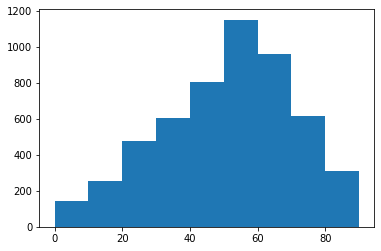

In [84]:
ages = [int(x) for x in df_patient.patientonsetage if not pd.isna(x)]
# assume ages >100 are something weird
a, b, c = plt.hist(ages, bins=np.arange(0, 100, 10))
print(len(ages), max(ages), min(ages))
# adverse affects peak around 50... is that weird?

In [97]:
reactions = [ reaction.get('reactionmeddrapt') for patient in df.patient for reaction in patient['reaction']]
#get list of all reactions
print( len(reactions), len(set(reactions)))
# shows that there's a lot of reactions (~35k) and a lot of unique reactions (~3k). but since the number of unique
# is so much smaller, that means there should be a lot of correlation --> matrix

35748 3170


In [137]:
# drop events with NaN onset ages and store as int
df_patient = df_patient.dropna(subset=['patientonsetage'])
df_patient['patientonsetage'] = df_patient.patientonsetage.astype(int)
# make three age categories
df_patient_onsetage_50to60 = df_patient[ (df_patient.patientonsetage > 50) & (df_patient.patientonsetage < 60)]
df_patient_onsetage_over65 = df_patient[ (df_patient.patientonsetage > 65) & (df_patient.patientonsetage < 110)]
df_patient_onsetage_under45 = df_patient[ (df_patient.patientonsetage < 45)]
# make reactions based on age category
reactions_50to60 = [ r.get('reactionmeddrapt') for reaction in df_patient_onsetage_50to60.reaction for r in reaction]
reactions_over65 = [ r.get('reactionmeddrapt') for reaction in df_patient_onsetage_over65.reaction for r in reaction]
reactions_under45 = [ r.get('reactionmeddrapt') for reaction in df_patient_onsetage_under45.reaction for r in reaction]

In [190]:
def countUnique(reactionsList):
    (unique, counts) = np.unique( reactionsList, return_counts=True)
    frequencies = np.asarray((unique, counts)).T
    print(frequencies)
    freq2 = sorted( frequencies, key=lambda pair: int(pair[1]), reverse=True) 
    print(freq2[:10])
    return freq2[:10]

In [182]:
counts_under45 = countUnique(reactions_under45)

[['ABASIA' '1']
 ['ABDOMINAL DISCOMFORT' '13']
 ['ABDOMINAL DISTENSION' '7']
 ...
 ['WRONG TECHNIQUE IN DRUG USAGE PROCESS' '29']
 ['YAWNING' '1']
 ['YELLOW SKIN' '3']]
[array(['INJECTION SITE PAIN', '131'], dtype='<U52'), array(['DEVICE EXPULSION', '124'], dtype='<U52'), array(['INJECTION SITE ERYTHEMA', '95'], dtype='<U52'), array(['NAUSEA', '95'], dtype='<U52'), array(['HEADACHE', '80'], dtype='<U52'), array(['FATIGUE', '75'], dtype='<U52'), array(['DRUG INEFFECTIVE', '72'], dtype='<U52'), array(['PYREXIA', '56'], dtype='<U52'), array(['INJECTION SITE SWELLING', '55'], dtype='<U52'), array(['VOMITING', '50'], dtype='<U52')]


In [180]:
counts_50to60 = countUnique(reactions_50to60)

[['ABASIA' '9']
 ['ABDOMINAL DISCOMFORT' '6']
 ['ABDOMINAL DISTENSION' '5']
 ...
 ['WRIST SURGERY' '1']
 ['WRONG DRUG ADMINISTERED' '1']
 ['WRONG TECHNIQUE IN DRUG USAGE PROCESS' '15']]
[array(['INJECTION SITE PAIN', '79'], dtype='<U66'), array(['DRUG INEFFECTIVE', '58'], dtype='<U66'), array(['NAUSEA', '55'], dtype='<U66'), array(['HEADACHE', '54'], dtype='<U66'), array(['DIARRHOEA', '52'], dtype='<U66'), array(['FATIGUE', '47'], dtype='<U66'), array(['INJECTION SITE ERYTHEMA', '46'], dtype='<U66'), array(['PAIN', '45'], dtype='<U66'), array(['ARTHRALGIA', '40'], dtype='<U66'), array(['PAIN IN EXTREMITY', '36'], dtype='<U66')]


In [181]:
counts_over65 = countUnique(reactions_over65)

[['ABASIA' '12']
 ['ABDOMINAL DISCOMFORT' '10']
 ['ABDOMINAL DISTENSION' '6']
 ...
 ['WRIST FRACTURE' '2']
 ['WRONG DRUG ADMINISTERED' '2']
 ['WRONG TECHNIQUE IN DRUG USAGE PROCESS' '2']]
[array(['DRUG INEFFECTIVE', '63'], dtype='<U62'), array(['NAUSEA', '45'], dtype='<U62'), array(['ARTHRALGIA', '43'], dtype='<U62'), array(['FALL', '42'], dtype='<U62'), array(['DIARRHOEA', '41'], dtype='<U62'), array(['DEATH', '40'], dtype='<U62'), array(['DYSPNOEA', '37'], dtype='<U62'), array(['FATIGUE', '37'], dtype='<U62'), array(['RENAL FAILURE ACUTE', '37'], dtype='<U62'), array(['ASTHENIA', '36'], dtype='<U62')]


In [252]:
top10_reactions_under45 = [ pair[0] for pair in counts_under45 ]
top10_counts_under45    = [ int(pair[1]) for pair in counts_under45 ]
top10_reactions_50to60  = [ pair[0] for pair in counts_50to60 ]
top10_counts_50to60     = [ int(pair[1]) for pair in counts_50to60 ]
top10_reactions_over65  = [ pair[0] for pair in counts_over65 ]
top10_counts_over65     = [ int(pair[1]) for pair in counts_over65 ]

In [248]:
allReactions = list(set(top10_reactions_under45 + top10_reactions_50to60 + top10_reactions_over65))
allReactions

['INJECTION SITE SWELLING',
 'ARTHRALGIA',
 'NAUSEA',
 'RENAL FAILURE ACUTE',
 'DEATH',
 'DIARRHOEA',
 'ASTHENIA',
 'INJECTION SITE ERYTHEMA',
 'FATIGUE',
 'DRUG INEFFECTIVE',
 'INJECTION SITE PAIN',
 'HEADACHE',
 'PAIN',
 'VOMITING',
 'PYREXIA',
 'FALL',
 'DYSPNOEA',
 'DEVICE EXPULSION',
 'PAIN IN EXTREMITY']

<BarContainer object of 10 artists>

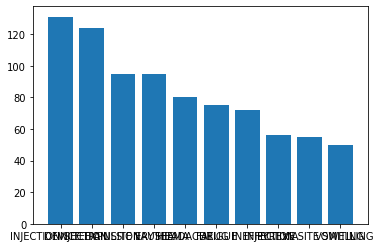

In [253]:
plt.bar( top10_reactions_under45, top10_counts_under45)

In [254]:
#maybe think of some way to store original tuple as dict and then plot n_reactions/n_population for three age groups
# then compare a few common reactions across ages